In [1]:
import numpy as np
import os
import datetime
from astropy.io import fits
import xspec
from xspec import *
from xspec import AllModels, AllData, Fit, Plot

AllData.clear()
AllModels.clear()

basepathmod = '/mnt/c/Users/User/Downloads/chspec-main/'
AllModels.lmod('chspec', dirPath=basepathmod)
print("Model package chisoth successfully loaded.")




Model package chspec successfully loaded.
Model package chisoth successfully loaded.


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import glob


# Initialize lists to store the results
temperatur = []
temperatur_err=[]
Tem=[]
norm = []
norm_err=[]
r_chi=[]

Fe_abun=[]
Ni_abun=[]
S_err=[]
Ca_abun=[]
Ar_abun=[]
S_abun=[]
Fe_err=[]
Ni_err=[]
Ar_err=[]
Ca_err=[]
time=[]
timeFe=[]
timeNi=[]
timeCa=[]
timeAr=[]
timeS=[]
spect=[]
# Load the data file
#file = "spectra/spectra1/Al1_spec"

Plot.device = '/xw'    
Plot.xAxis = 'keV'

#Plot('ld')



In [25]:

files1="paper/ch2_xsm_20240912_2_binwise_corrected.pha"
for i in range(1,61):

    
    AllData.clear()
    AllModels.clear()
    spec=xspec.Spectrum(f"{files1}{{{i}}}")
    
    
    spec.ignore("**-2.2 10.0-**")
    xspec.AllModels.systematic = 0.00
    xspec.AllModels.clear()
    time.append(i*30)
    model1 = xspec.Model("chisoth")
    model1(1).values=[7]
    xspec.Fit.perform()
    
    model1(18).frozen = False  # Ar Abundance
    model1(20).frozen = False  #Ca Abundance
    model1(26).frozen = False  # Fe Abundance
    model1(28).frozen = False #Ni Abundance
    model1(16).frozen=False # S abundance
    #model1(14).frozen=False #Si abundance
    
    xspec.Fit.perform()

    if model1(26).sigma<=1:
       Fe_abun.append(model1(26).values[0])
       Fe_err.append(model1(26).sigma)
       timeFe.append(i*30)
    if model1(20).sigma<=1:   
       Ca_abun.append(model1(20).values[0])
       Ca_err.append(model1(20).sigma)
       timeCa.append(i*30)
    if model1(18).sigma<=1:
       Ar_abun.append(model1(18).values[0]) 
       Ar_err.append(model1(18).sigma)
       timeAr.append(i*30)
    if model1(28).sigma<=1:
       Ni_abun.append(model1(28).values[0])
       Ni_err.append(model1(28).sigma)
       timeNi.append(i*30)
    if model1(16).sigma<=1:
       S_abun.append(model1(16).values[0])
       S_err.append(model1(16).sigma)
       timeS.append(i*30)
    #Si_abun.append(model1(14).values[0])
    temp=10**model1(1).values[0]
    
    # Perform the fit
     #xspec.Fit.perform()
    # Extract the parameters
    temperatur.append(temp/1000000)
    temperatur_err.append(model1(1).sigma)
    Tem.append(model1(1).values[0])
    norm.append(model1(31).values[0])
    norm_err.append(model1(31).sigma)
    #spectru= np.array(xspec.Plot.y(1))
    #spect.append(spectru)
    chisq = Fit.statistic  # Total chi-square value
    dof = Fit.dof          # Degrees of freedom
    reduced_chisq = chisq / dof  # Reduced chi-square
    r_chi.append(reduced_chisq) 
    xspec.Plot("ldata delchi")
    
    


1 spectrum  in use
 
Spectral Data File: paper/ch2_xsm_20240912_2_binwise_corrected.pha{1}  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.858e+04 +/- 1.070e+02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-512
  Telescope: CH-2_ORBITER Instrument: CH2_XSM  Channel Type: PI
  Exposure Time: 30 sec
 Using fit statistic: chi
 Using Response (RMF) File            /home/soumya/xsmdas_directory/xsmdas/caldb/CH2xsmresponse20200423v01.rmf for Source 1
 Using Auxiliary Response (ARF) File  ch2_xsm_20240912_2.arf{1}

    52 channels (1-52) ignored in spectrum #     1
   225 channels (288-512) ignored in spectrum #     1


 The default systematic error for models is set to 0


Model chisoth<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   chisoth    logT       K        6.39000      +/-  0.0          
   2    1   chisoth    He                  10.9000      frozen
   3    1   chisoth    Li                  1.64000      f

In [26]:
from astropy.io import fits
import numpy as np

# Your data arrays
data_dict = {
    'temperatur': temperatur,
    'temperatur_err': temperatur_err,
    'norm': norm,
    'norm_err': norm_err,
    'r_chi': r_chi,
    'Fe_abun': Fe_abun,
    'Ni_abun': Ni_abun,
    'S_err': S_err,
    'Ca_abun': Ca_abun,
    'Ar_abun': Ar_abun,
    'S_abun': S_abun,
    'Fe_err': Fe_err,
    'Ni_err': Ni_err,
    'Ar_err': Ar_err,
    'Ca_err': Ca_err,
    'time': time,
    'timeFe': timeFe,
    'timeNi': timeNi,
    'timeCa': timeCa,
    'timeAr': timeAr,
    'timeS': timeS
}

# Create columns for FITS Table
cols = []
for key, value in data_dict.items():
    col = fits.Column(name=key, array=np.array(value), format='D')  # 'D' = 64-bit float
    cols.append(col)

# Create FITS HDU
hdu = fits.BinTableHDU.from_columns(cols)
hdu.writeto('paper/fit_results_xsm.fits', overwrite=True)


In [23]:


# Initialize lists to store the results
temperatu = []
temperatu_er=[]
nor_er=[]
nor = []
r_ch=[]

Fe_abu=[]
Ni_abu=[]
S_er=[]
Ca_abu=[]
Ar_abu=[]
S_abu=[]
Fe_er=[]
Ni_er=[]
Ar_er=[]
Ca_er=[]
tim=[]
timeF=[]
timeN=[]
timeC=[]
timeA=[]
times=[]
spe=[]
# Load the data file
#file = "spectra/spectra1/Al1_spec"


#Plot('ld')



In [24]:

files1="paper/ch2_xsm_20240912_2.pha"
for i in range(1,61):

    
    AllData.clear()
    AllModels.clear()
    spec=xspec.Spectrum(f"{files1}{{{i}}}")
    
    
    spec.ignore("**-2.2 10.0-**")
    xspec.AllModels.systematic = 0.00
    xspec.AllModels.clear()
    tim.append(i*30)
    model1 = xspec.Model("chisoth")
    model1(1).values=[7]
    
    model1(18).frozen = False  # Ar Abundance
    model1(20).frozen = False  #Ca Abundance
    model1(26).frozen = False  # Fe Abundance
    model1(28).frozen = False #Ni Abundance
    model1(16).frozen=False # S abundance
    xspec.Fit.perform()

    if model1(26).sigma<=1:
       Fe_abu.append(model1(26).values[0])
       Fe_er.append(model1(26).sigma)
       timeF.append(i*30)
    if model1(20).sigma<=1:   
       Ca_abu.append(model1(20).values[0])
       Ca_er.append(model1(20).sigma)
       timeC.append(i*30)
    if model1(18).sigma<=1:
       Ar_abu.append(model1(18).values[0]) 
       Ar_er.append(model1(18).sigma)
       timeA.append(i*30)
    if model1(28).sigma<=1:
       Ni_abu.append(model1(28).values[0])
       Ni_er.append(model1(28).sigma)
       timeN.append(i*30)
    if model1(16).sigma<=1:
       S_abu.append(model1(16).values[0])
       S_er.append(model1(16).sigma)
       times.append(i*30)
    #Si_abun.append(model1(14).values[0])
    tempe=10**model1(1).values[0]
    
    # Perform the fit
     #xspec.Fit.perform()
    # Extract the parameters
    temperatu.append(tempe/1000000)
    temperatu_er.append(model1(1).sigma)
    nor.append(model1(31).values[0])
    nor_er.append(model1(31).sigma)
    #spectrum= np.array(xspec.Plot.y(1))
    #spe.append(spectrum)
    chisq = Fit.statistic  # Total chi-square value
    dof = Fit.dof          # Degrees of freedom
    reduced_chisq = chisq / dof  # Reduced chi-square
    r_ch.append(reduced_chisq) 
    xspec.Plot("ldata delchi")
    
    

In [148]:


# Initialize lists to store the results
temperatu = []
temperatu_er=[]
nor_er=[]
nor = []
r_ch=[]

Fe_abu=[]
Ni_abu=[]
S_er=[]
Ca_abu=[]
Ar_abu=[]
S_abu=[]
Fe_er=[]
Ni_er=[]
Ar_er=[]
Ca_er=[]
tim=[]
timeF=[]
timeN=[]
timeC=[]
timeA=[]
times=[]
spe=[]
# Load the data file
#file = "spectra/spectra1/Al1_spec"


#Plot('ld')



In [149]:

files1="paper/ch2_xsm_20240912_2_binwise_corrected.pha"
for i in range(1,61):

    
    AllData.clear()
    AllModels.clear()
    spec=xspec.Spectrum(f"{files1}{{{i}}}")
    
    
    spec.ignore("**-2.8 10.0-**")
    xspec.AllModels.systematic = 0.00
    xspec.AllModels.clear()
    tim.append(i*30)
    model1 = xspec.Model("chisoth")
    model1(1).values=[Tem[i-1]]
    model1(31).values=[norm[i-1]]
    
    
    
    #model1(14).frozen=False #Si abundance
    AllData.fakeit()
    sim_spec = xspec.AllData(1)
    sim_spec.ignore("**-2.8 10.0-**")
    model1(18).frozen = False  # Ar Abundance
    model1(20).frozen = False  #Ca Abundance
    model1(26).frozen = False  # Fe Abundance
    model1(28).frozen = False #Ni Abundance
    #model1(16).frozen=False # S abundance
    xspec.Fit.perform()

    if model1(26).sigma<=1:
       Fe_abu.append(model1(26).values[0])
       Fe_er.append(model1(26).sigma)
       timeF.append(i*30)
    if model1(20).sigma<=1:   
       Ca_abu.append(model1(20).values[0])
       Ca_er.append(model1(20).sigma)
       timeC.append(i*30)
    if model1(18).sigma<=1:
       Ar_abu.append(model1(18).values[0]) 
       Ar_er.append(model1(18).sigma)
       timeA.append(i*30)
    if model1(28).sigma<=1:
       Ni_abu.append(model1(28).values[0])
       Ni_er.append(model1(28).sigma)
       timeN.append(i*30)
    if model1(16).sigma<=1:
       S_abu.append(model1(16).values[0])
       S_er.append(model1(16).sigma)
       times.append(i*30)
    #Si_abun.append(model1(14).values[0])
    tempe=10**model1(1).values[0]
    
    # Perform the fit
     #xspec.Fit.perform()
    # Extract the parameters
    temperatu.append(tempe/1000000)
    temperatu_er.append(model1(1).sigma)
    nor.append(model1(31).values[0])
    nor_er.append(model1(31).sigma)
    #spectrum= np.array(xspec.Plot.y(1))
    #spe.append(spectrum)
    chisq = Fit.statistic  # Total chi-square value
    dof = Fit.dof          # Degrees of freedom
    reduced_chisq = chisq / dof  # Reduced chi-square
    r_ch.append(reduced_chisq) 
    xspec.Plot("ldata delchi")
    
    

Filename: /mnt/c/Users/User/Downloads/work/ch2_xsm_20240912_v1/xsm/data/2024/09/12/calibrated/ch2_xsm_20240912_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   80611R x 4C   [D, E, E, E]   
None


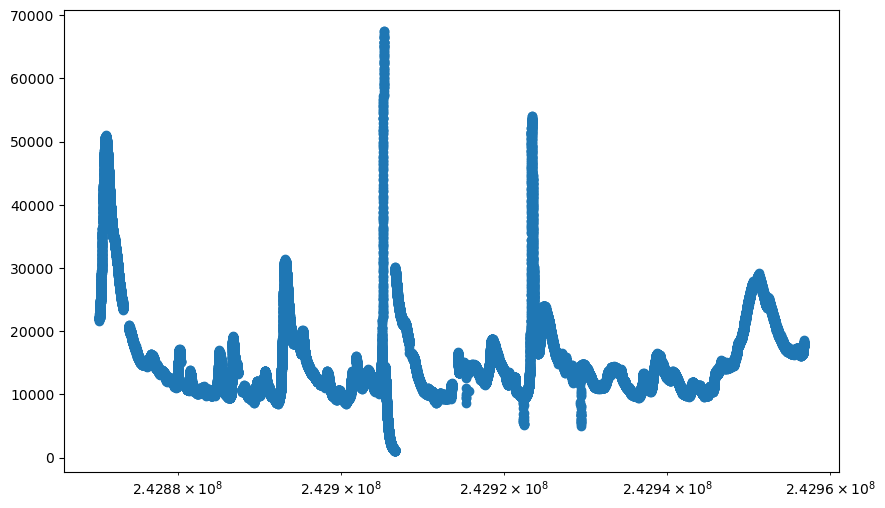

In [27]:
#file=fits.open("/mnt/c/Users/User/Downloads/work/AL1_SOLEXS_20240912_SDD2_L1.lc")
file=fits.open("/mnt/c/Users/User/Downloads/work/ch2_xsm_20240912_v1/xsm/data/2024/09/12/calibrated/ch2_xsm_20240912_v1_level2.lc")
print(file.info())
#extracting data
data=file[1].data

#print(file[1].header)
time2 = data['TIME']
counts1 = data['RATE']
#plotting
plt.figure(figsize=(10, 6))
plt.xscale('log')
#plt.axvspan(242867729.83908,242870399.603349) 
plt.plot(time2, counts1,'o',label='XSM light curve')

In [28]:
Time=[]
Counts=[]
time3=time2[0:1800]
Time.append(np.array(time3))
Counts.append(counts1[0:1800])


In [29]:
cnts = np.concatenate(Counts)
tme=np.concatenate(Time)

In [30]:
tme=tme-tme[0]

In [32]:
import datetime


def timestamp2datetime(timestamp_arr):
    datetime_arr = []
    for ta in timestamp_arr:
        datetime_arr.append(datetime.datetime.fromtimestamp(ta))
    return datetime_arr
converted_datetimes = timestamp2datetime(tme)


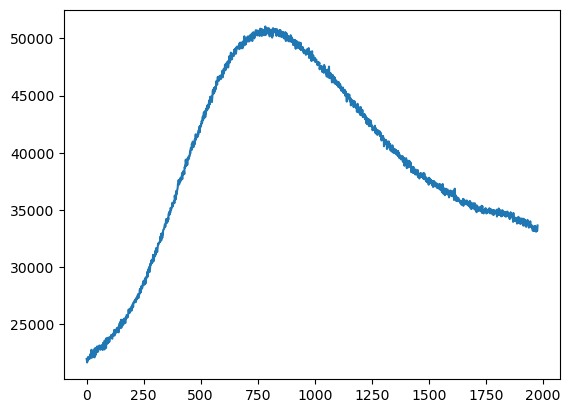

In [27]:
plt.plot(tme,cnts)
plt.show()

/tmp/ipykernel_1979/840230005.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs2.legend(loc='lower right')
/tmp/ipykernel_1979/840230005.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs2.legend(loc='lower right')
/tmp/ipykernel_1979/840230005.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs2.legend(loc='lower right')
/tmp/ipykernel_1979/840230005.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs2.legend(loc='lower right')
/tmp/ipykernel_1979/840230005.py:93: Use

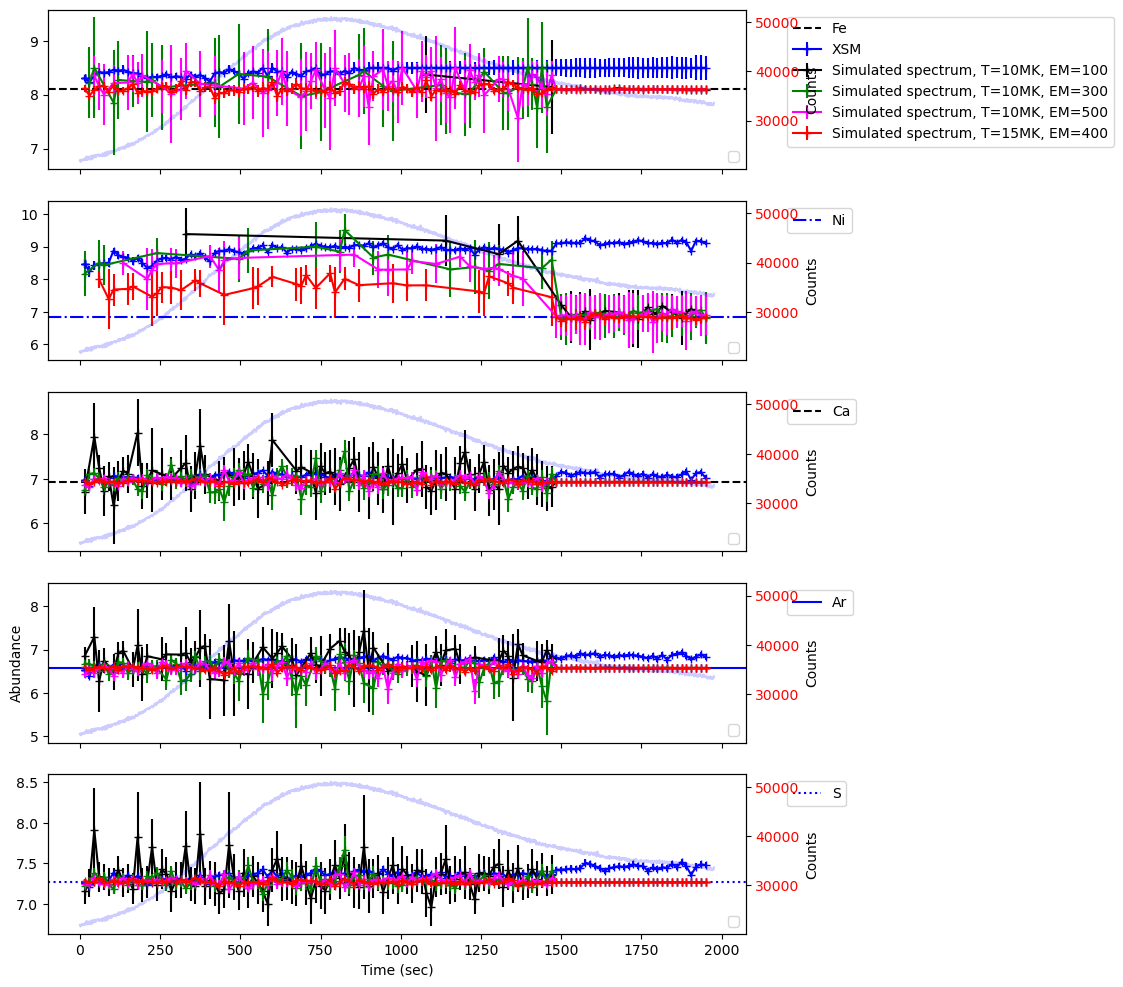

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits




fig,ax=plt.subplots(5,1,figsize=(9,12),gridspec_kw={'height_ratios':(2,2,2,2,2)},sharex=True)



  




ax[0].errorbar(timeFe,Fe_abun,yerr=Fe_err,fmt='+',linestyle='-',color='blue',label='XSM')
ax[0].errorbar(timeF,Fe_abu,yerr=Fe_er,fmt='+',linestyle='-',color='black',label='Simulated spectrum, T=10MK, EM=100')
ax[0].errorbar(timeF1,Fe_abu1,yerr=Fe_er1,fmt='+',linestyle='-',color='green',label='Simulated spectrum, T=10MK, EM=300')
ax[0].errorbar(timeF2,Fe_abu2,yerr=Fe_er2,fmt='+',linestyle='-',color='magenta',label='Simulated spectrum, T=10MK, EM=500')
ax[0].errorbar(timeF3,Fe_abu3,yerr=Fe_er3,fmt='+',linestyle='-',color='red',label='Simulated spectrum, T=15MK, EM=400')
ax[0].axhline(y=8.10,linestyle='--',color='black',label='Fe')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2=ax[0].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2)
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')
axs2.legend(loc='lower right')


ax[1].errorbar(timeNi,Ni_abun,yerr=Ni_err,fmt='+',linestyle='-',color='blue')
ax[1].errorbar(timeN,Ni_abu,yerr=Ni_er,fmt='+',linestyle='-',color='black')
ax[1].errorbar(timeN1,Ni_abu1,yerr=Ni_er1,fmt='+',linestyle='-',color='green')
ax[1].errorbar(timeN2,Ni_abu2,yerr=Ni_er2,fmt='+',linestyle='-',color='magenta')
ax[1].errorbar(timeN3,Ni_abu3,yerr=Ni_er3,fmt='+',linestyle='-',color='red')
ax[1].axhline(y=6.84,linestyle='-.',color='blue',label='Ni')
#ax[1].axvline(400,linestyle='--',color='black',label='M6 flare peak')
#ax[1].set_ylim(5,10)
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2=ax[1].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2)
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')
axs2.legend(loc='lower right')




ax[2].errorbar(timeCa,Ca_abun,yerr=Ca_err,fmt='+',linestyle='-',color='blue')
ax[2].errorbar(timeC,Ca_abu,yerr=Ca_er,fmt='+',linestyle='-',color='black')
ax[2].errorbar(timeC1,Ca_abu1,yerr=Ca_er1,fmt='+',linestyle='-',color='green')
ax[2].errorbar(timeC2,Ca_abu2,yerr=Ca_er2,fmt='+',linestyle='-',color='magenta')
ax[2].errorbar(timeC3,Ca_abu3,yerr=Ca_er3,fmt='+',linestyle='-',color='red')
ax[2].axhline(y=6.93,linestyle='--',color='black',label='Ca')
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2=ax[2].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2)
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')
axs2.legend(loc='lower right')



ax[3].errorbar(timeAr,Ar_abun,yerr=Ar_err,fmt='+',linestyle='-',color='blue')
ax[3].errorbar(timeA,Ar_abu,yerr=Ar_er,fmt='+',linestyle='-',color='black')
ax[3].errorbar(timeA1,Ar_abu1,yerr=Ar_er1,fmt='+',linestyle='-',color='green')
ax[3].errorbar(timeA2,Ar_abu2,yerr=Ar_er2,fmt='+',linestyle='-',color='magenta')
ax[3].errorbar(timeA3,Ar_abu3,yerr=Ar_er3,fmt='+',linestyle='-',color='red')
ax[3].axhline(y=6.58,linestyle='-',color='blue', label='Ar')
ax[3].set_ylabel('Abundance')
#ax[2].axvline(400,linestyle='--',color='black',label='M6 flare peak')
#ax[2].set_ylim(5.5,8)
ax[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2=ax[3].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2)
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')
axs2.legend(loc='lower right')

ax[4].errorbar(time,S_abun,yerr=S_err,fmt='+',linestyle='-',color='blue')
ax[4].errorbar(times,S_abu,yerr=S_er,fmt='+',linestyle='-',color='black')
ax[4].errorbar(times1,S_abu1,yerr=S_er1,fmt='+',linestyle='-',color='green')
ax[4].errorbar(times2,S_abu2,yerr=S_er2,fmt='+',linestyle='-',color='magenta')
ax[4].errorbar(times3,S_abu3,yerr=S_er3,fmt='+',linestyle='-',color='red')
ax[4].axhline(y=7.27,linestyle=':',color='blue',label='S')
#ax[3].axvline(400,linestyle='--',color='black',label='M6 flare peak')
ax[4].set_xlabel('Time (sec)')
ax[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2=ax[4].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2)
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')
axs2.legend(loc='lower right')

 
plt.savefig("paper/xsm_fakeit_abun_2_10.png",dpi=600,bbox_inches='tight')
plt.show()


In [33]:
# Initialize lists to store the results
temperatu3 = []
temperatu_er3=[]
nor_er3=[]
Temper=[]
nor3= []
r_ch3=[]

Fe_abu3=[]
Ni_abu3=[]
S_er3=[]
Ca_abu3=[]
Ar_abu3=[]
S_abu3=[]
Fe_er3=[]
Ni_er3=[]
Ar_er3=[]
Ca_er3=[]
tim3=[]
timeF3=[]
timeN3=[]
timeC3=[]
timeA3=[]
times3=[]
spe3=[]

In [34]:
files2 = sorted(glob.glob("paper/al1_20240912/" + "*.pi"))


for i, file in enumerate(files2,start=1):
    
    
    AllData.clear()
    AllModels.clear()
    spec=xspec.Spectrum(file)
    
    
    spec.ignore("**-2.2 10.0-**")
    xspec.AllModels.systematic = 0.04
    xspec.AllModels.clear()
    tim3.append(i*30)
    model1 = xspec.Model("chisoth")
    model1(1).values=[7]
    
    
    
    #model1(14).frozen=False #Si abundance
    
    model1(18).frozen = False  # Ar Abundance
    model1(20).frozen = False  #Ca Abundance
    model1(26).frozen = False  # Fe Abundance
    model1(28).frozen = False #Ni Abundance
    model1(16).frozen=False # S abundance
    xspec.Fit.perform()

    if model1(26).sigma<=1:
       Fe_abu3.append(model1(26).values[0])
       Fe_er3.append(model1(26).sigma)
       timeF3.append(i*30)
    if model1(20).sigma<=1:   
       Ca_abu3.append(model1(20).values[0])
       Ca_er3.append(model1(20).sigma)
       timeC3.append(i*30)
    if model1(18).sigma<=1:
       Ar_abu3.append(model1(18).values[0]) 
       Ar_er3.append(model1(18).sigma)
       timeA3.append(i*30)
    if model1(28).sigma<=1:
       Ni_abu3.append(model1(28).values[0])
       Ni_er3.append(model1(28).sigma)
       timeN3.append(i*30)
    if model1(16).sigma<=1:
       S_abu3.append(model1(16).values[0])
       S_er3.append(model1(16).sigma)
       times3.append(i*30)
    #Si_abun.append(model1(14).values[0])
    tempe=10**model1(1).values[0]
    
    # Perform the fit
     #xspec.Fit.perform()
    # Extract the parameters
    temperatu3.append(tempe/1000000)
    temperatu_er3.append(model1(1).sigma)
    Temper.append(model1(1).values[0])
    nor3.append(model1(31).values[0])
    nor_er3.append(model1(31).sigma)
    #spe1.append(np.array(xspec.Plot.y(1)))
    chisq = Fit.statistic  # Total chi-square value
    dof = Fit.dof          # Degrees of freedom
    reduced_chisq = chisq / dof  # Reduced chi-square
    r_ch3.append(reduced_chisq) 
    xspec.Plot("ldata delchi")
    

In [37]:

# Your data arrays
data_dict = {
    'temperatur': temperatu3,
    'temperatur_err': temperatu_er3,
    'norm': nor3,
    'norm_err': nor_er3,
    'r_chi': r_ch3,
    'Fe_abun': Fe_abu3,
    'Ni_abun': Ni_abu3,
    'S_err': S_er3,
    'Ca_abun': Ca_abu3,
    'Ar_abun': Ar_abu3,
    'S_abun': S_abu3,
    'Fe_err': Fe_er3,
    'Ni_err': Ni_er3,
    'Ar_err': Ar_er3,
    'Ca_err': Ca_er3,
    'time': tim3,
    'timeFe': timeF3,
    'timeNi': timeN3,
    'timeCa': timeC3,
    'timeAr': timeA3,
    'timeS': times3
}

# Create columns for FITS Table
cols = []
for key, value in data_dict.items():
    col = fits.Column(name=key, array=np.array(value), format='D')  # 'D' = 64-bit float
    cols.append(col)

# Create FITS HDU
hdu = fits.BinTableHDU.from_columns(cols)
hdu.writeto('paper/fit_results_solexs.fits', overwrite=True)


In [31]:
# Initialize lists to store the results
temperatu4 = []
temperatu_er4=[]
nor_er4=[]
nor4= []
r_ch4=[]

Fe_abu4=[]
Ni_abu4=[]
S_er4=[]
Ca_abu4=[]
Ar_abu4=[]
S_abu4=[]
Fe_er4=[]
Ni_er4=[]
Ar_er4=[]
Ca_er4=[]
tim4=[]
timeF4=[]
timeN4=[]
timeC4=[]
timeA4=[]
times4=[]
spe4=[]

In [32]:
files2 = sorted(glob.glob("paper/al1_nodeadtime/" + "*.pi"))


for i, file in enumerate(files2,start=1):
    
    
    AllData.clear()
    AllModels.clear()
    spec=xspec.Spectrum(file)
    
    
    spec.ignore("**-2.2 10.0-**")
    xspec.AllModels.systematic = 0.04
    xspec.AllModels.clear()
    tim4.append(i*30)
    model1 = xspec.Model("chisoth")
    model1(1).values=[7]
    
    
    
    #model1(14).frozen=False #Si abundance
   
    model1(18).frozen = False  # Ar Abundance
    model1(20).frozen = False  #Ca Abundance
    model1(26).frozen = False  # Fe Abundance
    model1(28).frozen = False #Ni Abundance
    model1(16).frozen=False # S abundance
    xspec.Fit.perform()

    if model1(26).sigma<=1:
       Fe_abu4.append(model1(26).values[0])
       Fe_er4.append(model1(26).sigma)
       timeF4.append(i*30)
    if model1(20).sigma<=1:   
       Ca_abu4.append(model1(20).values[0])
       Ca_er4.append(model1(20).sigma)
       timeC4.append(i*30)
    if model1(18).sigma<=1:
       Ar_abu4.append(model1(18).values[0]) 
       Ar_er4.append(model1(18).sigma)
       timeA4.append(i*30)
    if model1(28).sigma<=1:
       Ni_abu4.append(model1(28).values[0])
       Ni_er4.append(model1(28).sigma)
       timeN4.append(i*30)
    if model1(16).sigma<=1:
       S_abu4.append(model1(16).values[0])
       S_er4.append(model1(16).sigma)
       times4.append(i*30)
    #Si_abun.append(model1(14).values[0])
    tempe=10**model1(1).values[0]
    
    # Perform the fit
     #xspec.Fit.perform()
    # Extract the parameters
    temperatu4.append(tempe/1000000)
    temperatu_er4.append(model1(1).sigma)
    nor4.append(model1(31).values[0])
    nor_er4.append(model1(31).sigma)
    #spe1.append(np.array(xspec.Plot.y(1)))
    chisq = Fit.statistic  # Total chi-square value
    dof = Fit.dof          # Degrees of freedom
    reduced_chisq = chisq / dof  # Reduced chi-square
    r_ch4.append(reduced_chisq) 
    xspec.Plot("ldata delchi")
    

In [160]:
# Initialize lists to store the results
temperatu4 = []
temperatu_er4=[]
nor_er4=[]
nor4= []
r_ch4=[]

Fe_abu4=[]
Ni_abu4=[]
S_er4=[]
Ca_abu4=[]
Ar_abu4=[]
S_abu4=[]
Fe_er4=[]
Ni_er4=[]
Ar_er4=[]
Ca_er4=[]
tim4=[]
timeF4=[]
timeN4=[]
timeC4=[]
timeA4=[]
times4=[]
spe4=[]

In [161]:
files2 = sorted(glob.glob("paper/al1_20240912/" + "*.pi"))


for i, file in enumerate(files2,start=1):
    
    
    AllData.clear()
    AllModels.clear()
    spec=xspec.Spectrum(file)
    
    
    spec.ignore("**-2.8 10.0-**")
    xspec.AllModels.systematic = 0.00
    xspec.AllModels.clear()
    tim4.append(i*30)
    model1 = xspec.Model("chisoth")
    model1(1).values=[Temper[i-1]]
    model1(31).values=[nor3[i-1]]
    
    
    #model1(14).frozen=False #Si abundance
    AllData.fakeit()
    sim_spec = xspec.AllData(1)
    sim_spec.ignore("**-2.8 10.0-**")
    model1(18).frozen = False  # Ar Abundance
    model1(20).frozen = False  #Ca Abundance
    model1(26).frozen = False  # Fe Abundance
    model1(28).frozen = False #Ni Abundance
   # model1(16).frozen=False # S abundance
    xspec.Fit.perform()

    if model1(26).sigma<=1:
       Fe_abu4.append(model1(26).values[0])
       Fe_er4.append(model1(26).sigma)
       timeF4.append(i*30)
    if model1(20).sigma<=1:   
       Ca_abu4.append(model1(20).values[0])
       Ca_er4.append(model1(20).sigma)
       timeC4.append(i*30)
    if model1(18).sigma<=1:
       Ar_abu4.append(model1(18).values[0]) 
       Ar_er4.append(model1(18).sigma)
       timeA4.append(i*30)
    if model1(28).sigma<=1:
       Ni_abu4.append(model1(28).values[0])
       Ni_er4.append(model1(28).sigma)
       timeN4.append(i*30)
    if model1(16).sigma<=1:
       S_abu4.append(model1(16).values[0])
       S_er4.append(model1(16).sigma)
       times4.append(i*30)
    #Si_abun.append(model1(14).values[0])
    tempe=10**model1(1).values[0]
    
    # Perform the fit
     #xspec.Fit.perform()
    # Extract the parameters
    temperatu4.append(tempe/1000000)
    temperatu_er4.append(model1(1).sigma)
    nor4.append(model1(31).values[0])
    nor_er4.append(model1(31).sigma)
    #spe1.append(np.array(xspec.Plot.y(1)))
    chisq = Fit.statistic  # Total chi-square value
    dof = Fit.dof          # Degrees of freedom
    reduced_chisq = chisq / dof  # Reduced chi-square
    r_ch4.append(reduced_chisq) 
    xspec.Plot("ldata delchi")
    

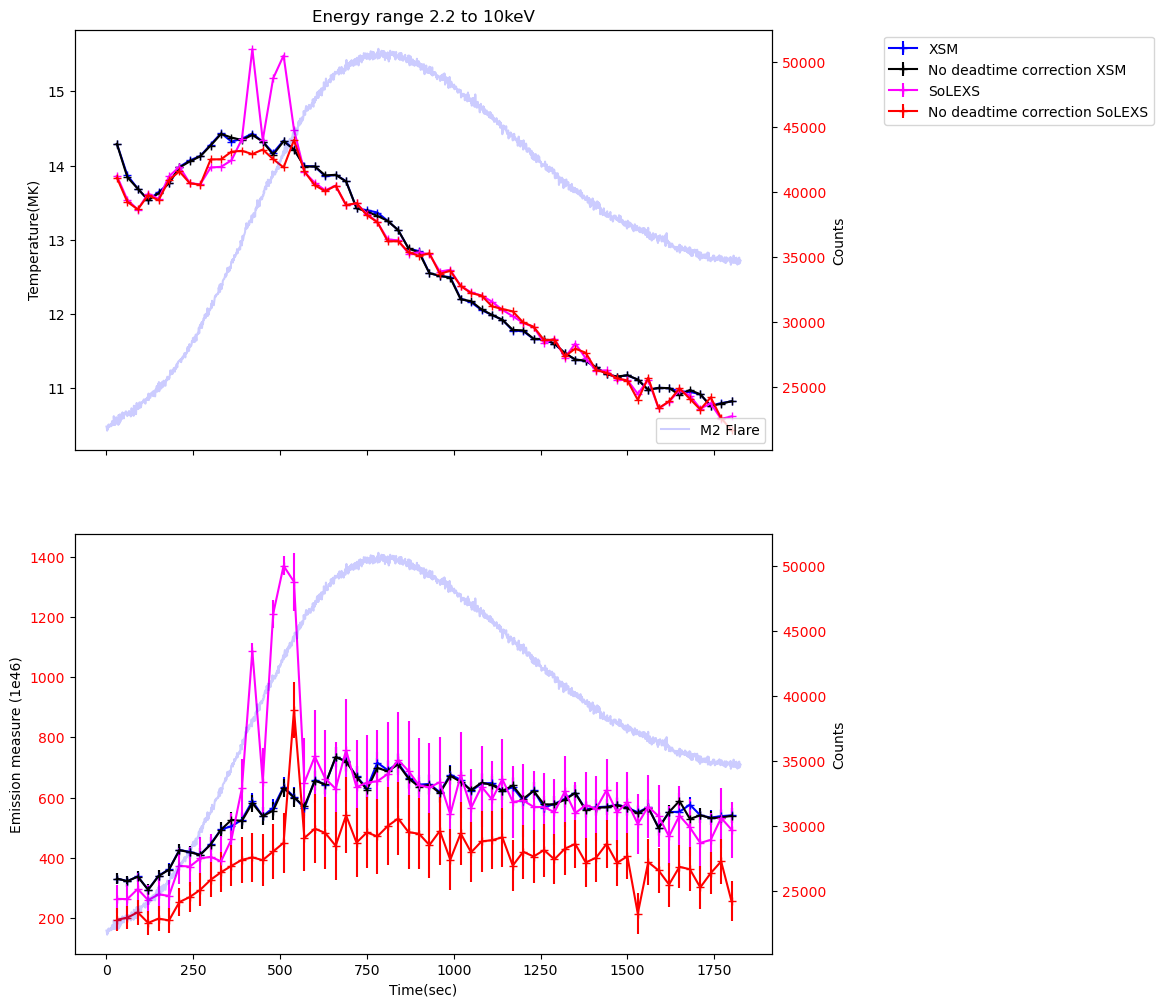

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits




fig,ax=plt.subplots(2,1,figsize=(9,12),gridspec_kw={'height_ratios':(2,2)},sharex=True)



  
ax[0].errorbar(time,temperatur,yerr=temperatur_err,fmt='+',linestyle='-',color='blue',label='XSM')
ax[0].errorbar(tim,temperatu,yerr=temperatu_er,fmt='+',linestyle='-',color='black',label='No deadtime correction XSM')
#ax[0].plot(tim1,temperatu1,'+',linestyle='-',color='green',label='Simulated spectrum, T=10MK, EM=300')
ax[0].errorbar(tim3,temperatu3,yerr=temperatu_er3,fmt='+',linestyle='-',color='magenta',label='SoLEXS')
ax[0].errorbar(tim4,temperatu4,yerr=temperatu_er4,fmt='+',linestyle='-',color='red',label='No deadtime correction SoLEXS')
ax[0].set_ylabel('Temperature(MK)')
ax[0].tick_params(axis='y')
ax[0].set_title("Energy range 2.2 to 10keV")
ax[0].legend(bbox_to_anchor=(1.15, 1), loc='upper left')
axs2=ax[0].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2,label='M2 Flare')
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')
axs2.legend(loc='lower right')

ax[1].errorbar(time,norm,yerr=norm_err,fmt='+',linestyle='-',color='blue')
ax[1].errorbar(tim,nor,yerr=nor_er,fmt='+',linestyle='-',color='black')
#ax[1].plot(tim1,nor1,'+',linestyle='-',color='green')
ax[1].errorbar(tim3,nor3,yerr=nor_er3,fmt='+',linestyle='-',color='magenta')
ax[1].errorbar(tim4,nor4,yerr=nor_er4,fmt='+',linestyle='-',color='red')
ax[1].set_ylabel('Emission measure (1e46)')
ax[1].set_xlabel('Time(sec)')

ax[1].tick_params(axis='y',labelcolor='r')

axs2=ax[1].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2)
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')





 
plt.savefig("paper/xsm_solexs_temp_2.2_10.png",dpi=600,bbox_inches='tight')
plt.show()


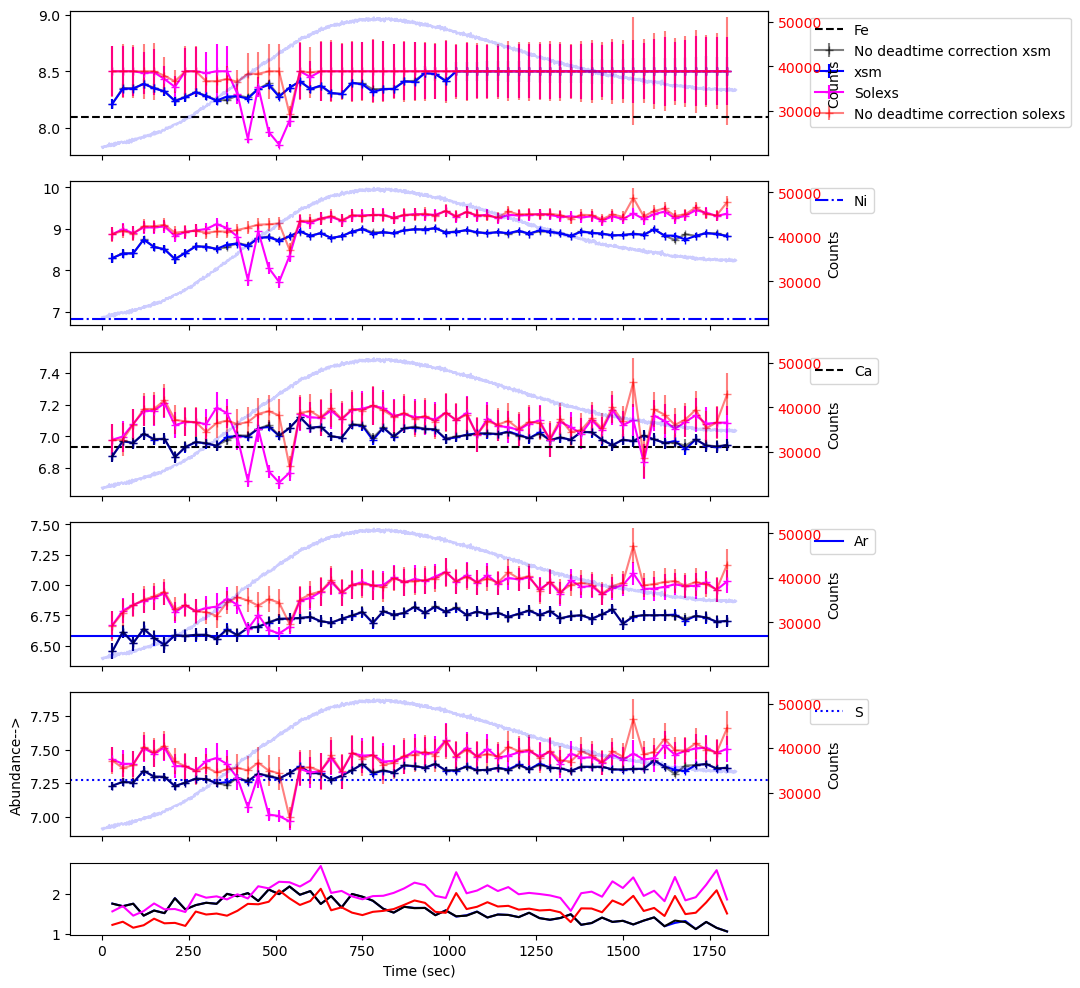

In [34]:

fig,ax=plt.subplots(6,1,figsize=(9,12),gridspec_kw={'height_ratios':(2,2,2,2,2,1)},sharex=True)


ax[0].errorbar(timeF,Fe_abu,yerr=Fe_er,fmt='+',linestyle='-',color='black',alpha=0.5,label='No deadtime correction xsm')
ax[0].errorbar(timeFe,Fe_abun,yerr=Fe_err,fmt='+',linestyle='-',color='blue',label='xsm')
ax[0].errorbar(timeF3,Fe_abu3,yerr=Fe_er3,fmt='+',linestyle='-',color='magenta',label='Solexs')
ax[0].errorbar(timeF4,Fe_abu4,yerr=Fe_er4,fmt='+',linestyle='-',color='red',alpha=0.5,label='No deadtime correction solexs')

ax[0].axhline(y=8.10,linestyle='--',color='black',label='Fe')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2=ax[0].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2)
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')




ax[1].errorbar(timeN,Ni_abu,yerr=Ni_er,fmt='+',linestyle='-',alpha=0.5,color='black')
ax[1].errorbar(timeNi,Ni_abun,yerr=Ni_err,fmt='+',linestyle='-',color='blue')
ax[1].errorbar(timeN3,Ni_abu3,yerr=Ni_er3,fmt='+',linestyle='-',color='magenta')
ax[1].errorbar(timeN4,Ni_abu4,yerr=Ni_er4,fmt='+',linestyle='-',alpha=0.5,color='red')

ax[1].axhline(y=6.84,linestyle='-.',color='blue',label='Ni')
#ax[1].axvline(400,linestyle='--',color='black',label='M6 flare peak')
#ax[1].set_ylim(5,10)
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2=ax[1].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2)
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')





ax[2].errorbar(timeCa,Ca_abun,yerr=Ca_err,fmt='+',linestyle='-',color='blue')
ax[2].errorbar(timeC,Ca_abu,yerr=Ca_er,fmt='+',linestyle='-',alpha=0.5,color='black')
ax[2].errorbar(timeC3,Ca_abu3,yerr=Ca_er3,fmt='+',linestyle='-',color='magenta')
ax[2].errorbar(timeC4,Ca_abu4,yerr=Ca_er4,fmt='+',linestyle='-',alpha=0.5,color='red')

ax[2].axhline(y=6.93,linestyle='--',color='black',label='Ca')
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2=ax[2].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2)
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')



ax[3].errorbar(timeAr,Ar_abun,yerr=Ar_err,fmt='+',linestyle='-',color='blue')
ax[3].errorbar(timeA,Ar_abu,yerr=Ar_er,fmt='+',linestyle='-',alpha=0.5,color='black')
ax[3].errorbar(timeA3,Ar_abu3,yerr=Ar_er3,fmt='+',linestyle='-',color='magenta')
ax[3].errorbar(timeA4,Ar_abu4,yerr=Ar_er4,fmt='+',linestyle='-',alpha=0.5,color='red')

ax[3].axhline(y=6.58,linestyle='-',color='blue', label='Ar')

#ax[2].axvline(400,linestyle='--',color='black',label='M6 flare peak')
#ax[2].set_ylim(5.5,8)
ax[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2=ax[3].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2)
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')


ax[4].errorbar(timeS,S_abun,yerr=S_err,fmt='+',linestyle='-',color='blue')
ax[4].errorbar(times,S_abu,yerr=S_er,fmt='+',linestyle='-',alpha=0.5,color='black')
ax[4].errorbar(times3,S_abu3,yerr=S_er3,fmt='+',linestyle='-',color='magenta')
ax[4].errorbar(times4,S_abu4,yerr=S_er4,fmt='+',linestyle='-',alpha=0.5,color='red')

ax[4].axhline(y=7.27,linestyle=':',color='blue',label='S')
#ax[3].axvline(400,linestyle='--',color='black',label='M6 flare peak')

ax[4].set_ylabel('Abundance-->')
ax[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs2=ax[4].twinx()
axs2.plot(tme,cnts,color='b',alpha=0.2)
axs2.set_ylabel('Counts')
axs2.tick_params(axis='y',labelcolor='r')

ax[5].plot(tim4,r_chi,linestyle='-',color='blue')
ax[5].plot(tim4,r_ch,linestyle='-',color='black')
ax[5].plot(tim4,r_ch3,linestyle='-',color='magenta')
ax[5].plot(tim4,r_ch4,linestyle='-',color='red')
ax[5].set_xlabel('Time (sec)')
 
plt.savefig("paper/xsm_solexs_abun_2.2_10.png",dpi=600,bbox_inches='tight')
plt.show()


In [44]:
fi=fits.open("/mnt/c/users/user/downloads/AL1_SOLEXS_20240912_SDD2_L1_puc_tb_fit_results.fits")
da=fi[1].header
d=fi[1].data
temp_=d['TEMPERATURE']
time_sherpa=d['TIME']
fe_abun=d['Fe_Abun']
ar_abun=d['Ar_abun']
ca_abun=d['ca_abun']
s_abun=d['s_abun']
EM=d['EM']
fe_err=d['fe_abun_err']

In [42]:
time_s=time_sherpa-time_sherpa[0]

In [48]:
time_s

array([   0. ,   30. ,   60. ,   90. ,  120. ,  150. ,  180. ,  210. ,
        240. ,  270. ,  300. ,  330. ,  360. ,  390. ,  420. ,  450. ,
        480. ,  510. ,  540. ,  570. ,  600. ,  630. ,  660. ,  690. ,
        720. ,  750. ,  780. ,  810. ,  840. ,  870. ,  900. ,  930. ,
        960. ,  990. , 1020. , 1050. , 1080. , 1110. , 1140. , 1170. ,
       1200. , 1230. , 1260. , 1290. , 1320. , 1350. , 1380. , 1410. ,
       1440. , 1470. , 1500. , 1530. , 1560. , 1590. , 1620. , 1650. ,
       1680. , 1710. , 1740. , 1770. , 1800. , 1830. , 1860. , 1890. ,
       1920. , 1950. , 1980. , 2025.5])

In [58]:
def abun_convertion(fip_bias):
    coronal_abundance=[]
    if fip_bias is fe_abun :
       photospheric_abundance=7.67  #(photospheric abundances from Grevesse and Anders 1989)
   # elif fip_bias is ni_abun:
       #photospheric_abundance=6.25  
    elif fip_bias is ar_abun:
       photospheric_abundance=6.56
    elif fip_bias is ca_abun:
       photospheric_abundance=6.36
    else:
        raise ValueError("Invalid fip_bias provided")
    #Convert photospheric abundance to linear scale
    photospheric_abundance_linear=10**(photospheric_abundance-12)
    for i in range(len(fip_bias)):
          # Calculate coronal abundance in linear scale
         coronal_abundance_linear = photospheric_abundance_linear *fip_bias[i]

         # Convert coronal abundance back to logarithmic scale
         coronal_abundance_log = 12 + np.log10(coronal_abundance_linear)
         coronal_abundance.append(coronal_abundance_log)
    return coronal_abundance

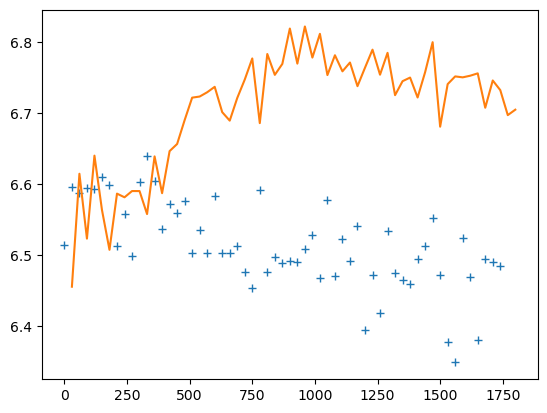

In [61]:
plt.plot(time_s[0:59],abun_convertion(ar_abun)[0:59],'+')
plt.plot(timeAr,Ar_abun)